# <center><font color = '#DF9166' size = 20 center> **Data Preprocessing and Exploration**</font></center>



## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Data Inspection**](#data_inspection)
4. [**Data Preprocessing**](#data_preprocessing)
5. [**Data Exploration**](#data_exploration)


## <font color = '#DF9166' size=6>**Import Libraries**<font/><a class = 'anchor' id = 'import'/>


In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd

from glob import glob

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", None)

In [3]:
sys.path.append(os.path.abspath(os.pardir))
from scripts.preprocess_data import extract_messages, clean_text
from scripts.visualize import *

## <font color = '#DF9166' size=6>**Data Loading**<font/><a class = 'anchor' id = 'data_loading'/>

In [4]:
DATA_PATHS = glob("../data/raw/scrapped channels/*/*")

In [5]:
df = extract_messages(DATA_PATHS)
df.sample(5)

,channel_name,channel_address,channel_id,message_id,date,message
12261,CLASSY BRAND ®,@classybrands,1175962785,4366,2022-08-29 16:00:23,"CLASSY BRAND \n\n⚡Air Jordan 3 “ Black Cement” 😱😘🤩\n\n⚡Packed With Box 📦 \n\n⚡Size 40,41,42,43,44\n\n⚡Price 2999Br \n\n⚡ ለሱቅና ብዛት ተረካቢዎች ባስተያየት እናስረክባለን \n👇👇👇\n\nShop Num ☎️ 0907000777\n\nManager 📞 0919181353\n\n Join 👉 @classybrands \n\n Inbox 👉 @classybrandseller \n\n📌አድራሻ - አዲስ አበባ, ሃያሁለት(22)፡ ታውን ስኩዬር ሞል 1ኛ ፍሎር ላይ፡ የሱቅ ቁ.108/3"
58503,አዳማ ገበያ - Adama gebeya,@gebeyaadama,1481223418,1612,2023-01-27 06:51:43,
87633,4Free Market🇪🇹,@forfreemarket,1204603336,1412,2021-04-20 12:58:02,
85610,Fashion tera,@Fashiontera,1175527648,2447,2021-08-26 16:56:14,"EMPORIO ARMANI\nPrice 1200\n(Free Delivery)\nInbox @Hiwe5266\nስልክ +251945355266\n\n ♦️ ፋሽን ተራ /Fashion Tera♦️\n 〰〰〰〰〰〰〰〰\nአድራሻ: አዲስ አበባ ,ጦር ሀይሎች ድሪም ታወር 2ተኛ ፎቅ\nቢሮ ቁጥር 205\n〰〰〰〰〰"
59888,አዳማ ገበያ - Adama gebeya,@gebeyaadama,1481223418,3209,2024-02-02 09:11:49,👉የልጆች ፍራፍሬ እና ምግብ መመገቢያ\n\n 💦 ዋጋ፦ ✅ 300 ብር \n \nአድራሻችን 👉 አዳማ ፖስታቤት አካባቢ ሶሬቲ ሞል ግራዎንድ ፍሎር ላይ በቀይመስቀሉ በኩል 33 ቁጥር እንገኛለን።\n\n ቴሌግራም \n👇👇👇👇👇👇👇\nhttps://t.me/gebeyaadama\n\nText- @GebeyaAdama21


## <font color = '#DF9166' size=6>**Data Inspection**<font/><a class = 'anchor' id = 'data_inspection'/>

In [6]:
print(f"Shape of Rating Dataframe: {df.shape}")

Shape of Rating Dataframe: (95415, 6)


In [7]:
print(f"Rating Dataframe Info: \n")
df.info()

Rating Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95415 entries, 0 to 95414
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channel_name     95415 non-null  object        
 1   channel_address  95415 non-null  object        
 2   channel_id       95415 non-null  int64         
 3   message_id       95415 non-null  int64         
 4   date             95415 non-null  datetime64[ns]
 5   message          95415 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.4+ MB


- **Total rows**: 95,415 entries.
- **Columns**: 6 columns — categorical (`channel_name`, `channel_address`), numeric (`channel_id`, `message_id`), datetime (`date`), and text (`message`).

In [8]:
# Calculate message length (characters) and word count for each message
df["message_length"] = df["message"].apply(len)
df["word_count"] = df["message"].apply(lambda x: len(x.split()))

# Descriptive statistics
print("Descriptive Statistics:\n")
df[["message_length", "word_count"]].describe()

Descriptive Statistics:



,message_length,word_count
count,95415.000000,95415.000000
mean,200.688812,31.964953
std,239.578960,39.212952
min,0.000000,0.000000
25%,0.000000,0.000000
50%,117.000000,19.000000
75%,331.000000,54.000000
max,4081.000000,766.000000


- **Message Length**: Average of 200.7 characters, highly variable (std = 239.6). Many short/empty messages, with a max of 4081 characters.
- **Word Count**: Average of 32 words, wide variation (std = 39.2). Many short/empty messages, with a max of 766 words.

We replace empty strings with `NaN` to treat them as missing values, ensuring consistent handling of null data in analysis.

In [9]:
# Replace empty strings with NaN
df["message"] = df["message"].replace("", np.nan)

In [10]:
# Check for missing values
print("Missing Values:\n")
df.isnull().sum()

Missing Values:



channel_name           0
channel_address        0
channel_id             0
message_id             0
date                   0
message            33518
message_length         0
word_count             0
dtype: int64

- **`message` Missing (33,518):** Significant gap; use handling strategies.

In [11]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


## <font color = '#DF9166' size=6>**Data Preprocessing**<font/><a class = 'anchor' id = 'data_preprocessing'/>

In [12]:
# Drop rows with null values in the "message" column
df.dropna(subset=["message"], axis=0, inplace=True)
print("Missing Values:\n")
df.isnull().sum()

Missing Values:



channel_name       0
channel_address    0
channel_id         0
message_id         0
date               0
message            0
message_length     0
word_count         0
dtype: int64

Now lets removes emojis and retains Ethiopic characters, English letters, numbers, punctuation, and spaces using a regex pattern.

In [13]:
# Apply clean_text function to create 'cleaned_message' column
df["cleaned_message"] = df["message"].apply(clean_text)
df.head(2)

,channel_name,channel_address,channel_id,message_id,date,message,message_length,word_count,cleaned_message
2,qnash.com - ቅናሽ ®️,@qnashcom,1336267238,18,2020-08-26 05:16:56,😍 ታላቅ ቅናሽ 😍\nዘመናዊ መደርደሪያው ብረት የሆነ ጫማ መደርደሪያ\n\n👟ባለ ዘጠኝ ጫማ መደርደሪያ 👠\n\n➡️ መደርደሪያው ሙሉ በሙሉ ብረት \n➡️ በቀላሉ ሚገጣጠም ሚነቃቀል\n➡️ህይወትዎን ቀለል ሚያረግ ዕቃ\n➡️ቦታ ማይዝ ለቤትዎ ተጨማሪ ውበት ሚሰጥ \n➡️ እስከ 27 ጫማ ማስቀመጥ ሚያስችል\n➡️ለአጠቃቀም በጣም ቀላል \n\nባለ አስር ደረጃ -- 1600 ብር\n \n🏍 ያሉበት ድረስ እናመጣለን\n 0946966440\n 0905464599,293,55,ታላቅ ቅናሽ \nዘመናዊ መደርደሪያው ብረት የሆነ ጫማ መደርደሪያ\n\nባለ ዘጠኝ ጫማ መደርደሪያ \n\n መደርደሪያው ሙሉ በሙሉ ብረት \n በቀላሉ ሚገጣጠም ሚነቃቀል\nህይወትዎን ቀለል ሚያረግ ዕቃ\nቦታ ማይዝ ለቤትዎ ተጨማሪ ውበት ሚሰጥ \n እስከ 27 ጫማ ማስቀመጥ ሚያስችል\nለአጠቃቀም በጣም ቀላል \n\nባለ አስር ደረጃ -- 1600 ብር\n \n ያሉበት ድረስ እናመጣለን\n 0946966440\n 0905464599
3,qnash.com - ቅናሽ ®️,@qnashcom,1336267238,19,2020-08-26 05:32:16,🚫ቤትዎን ከአይጥ 🐀 ከበረሮ🕷 እና ከተባይ🐜 🚫\n ነፃ ያድርጉ\n\n🎯 በቀላሉ በማንኛውም ሶኬት በመሰካት በሚለቀው አልትራሶኒክ ድምፅ በቤት ውስጥ የሚገኙ ጎጅ ነፍሳቶችን ከቤታችን የሚያባርር \n\n🎯 ለቤት ውስጥ ግልጋሎት የሚሆን ምንም የሚረብሽ ድምፅ፣ መጥፎ ሸታ እንዲሁም ኬሚካል የሌለው።\n\n🎯ጥቅም መስጠት የሚያስችለው ስፋት ከ 800_ 1200ካሬ ሜትር እስኩየር \n\n🎯የሀይል ፍጆታው አነስተኛ (90v_250v)\n\n🎯የሚሰራው 24 ሰአት 7 ሳምንት ብሎም ለአመታት \n\n📍ከ 2_3 ሳምንታት በሁዋላ ትክክለኛውን ውጤት ያገኙበታል \nይደውሉ ⤵️\n 📲0946966440 📲0905464599 \nዋጋ 🏷 850ብር \n\n🚛 ያሉበት ድረስ በኛው ትራንሰፓርት 🚚\n በነፃ እናደርሳለን\nለወዳጅዎ #Share ማድረግዎን አይርሱ,473,83,ቤትዎን ከአይጥ ከበረሮ እና ከተባይ \n ነፃ ያድርጉ\n\n በቀላሉ በማንኛውም ሶኬት በመሰካት በሚለቀው አልትራሶኒክ ድምፅ በቤት ውስጥ የሚገኙ ጎጅ ነፍሳቶችን ከቤታችን የሚያባርር \n\n ለቤት ውስጥ ግልጋሎት የሚሆን ምንም የሚረብሽ ድምፅ፣ መጥፎ ሸታ እንዲሁም ኬሚካል የሌለው።\n\nጥቅም መስጠት የሚያስችለው ስፋት ከ 800_ 1200ካሬ ሜትር እስኩየር \n\nየሀይል ፍጆታው አነስተኛ (90v_250v)\n\nየሚሰራው 24 ሰአት 7 ሳምንት ብሎም ለአመታት \n\nከ 2_3 ሳምንታት በሁዋላ ትክክለኛውን ውጤት ያገኙበታል \nይደውሉ \n 0946966440 0905464599 \nዋጋ 850ብር \n\n ያሉበት ድረስ በኛው ትራንሰፓርት \n በነፃ እናደርሳለን\nለወዳጅዎ #Share ማድረግዎን አይርሱ


In [14]:
# Save preprocessed data to csv file
df.to_csv("../data/processed/processed_data.csv")

## <font color = '#DF9166' size=6>**Data Exploration**<font/><a class = 'anchor' id = 'data_exploration'/>

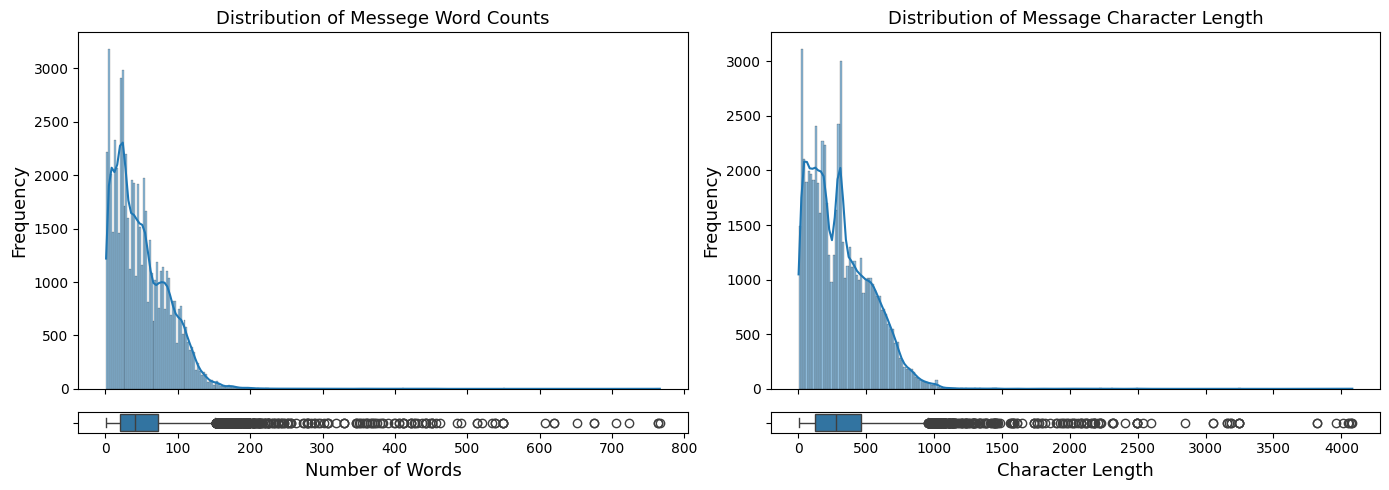

In [15]:
# Plots histograms and boxplots for word count and message length distributions.
generate_hist_box_plots(
    df,
    plot_data=[
        {
            "column": "word_count",
            "label": "Number of Words",
            "title": "Distribution of Messege Word Counts",
        },
        {
            "column": "message_length",
            "label": "Character Length",
            "title": "Distribution of Message Character Length",
        },
    ],
)

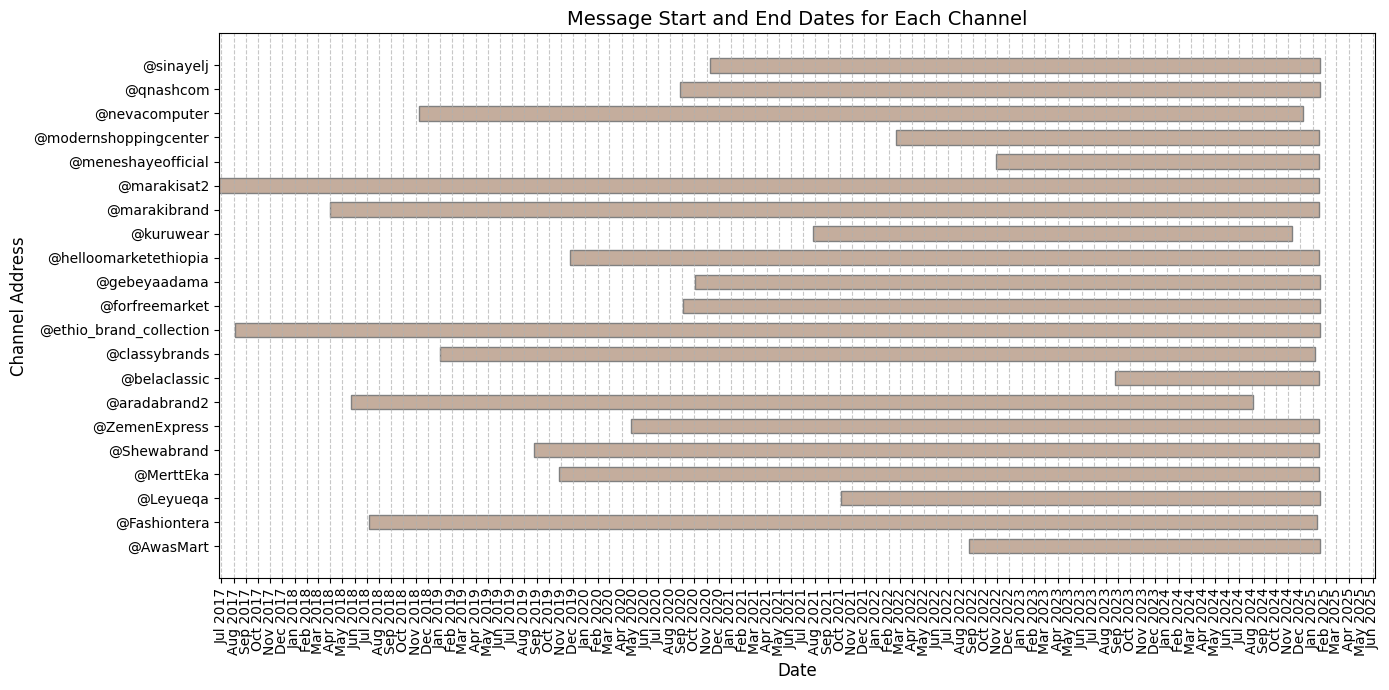

In [16]:
# Plot Gantt chart of message dates for each channel
plot_gantt_chart(df)

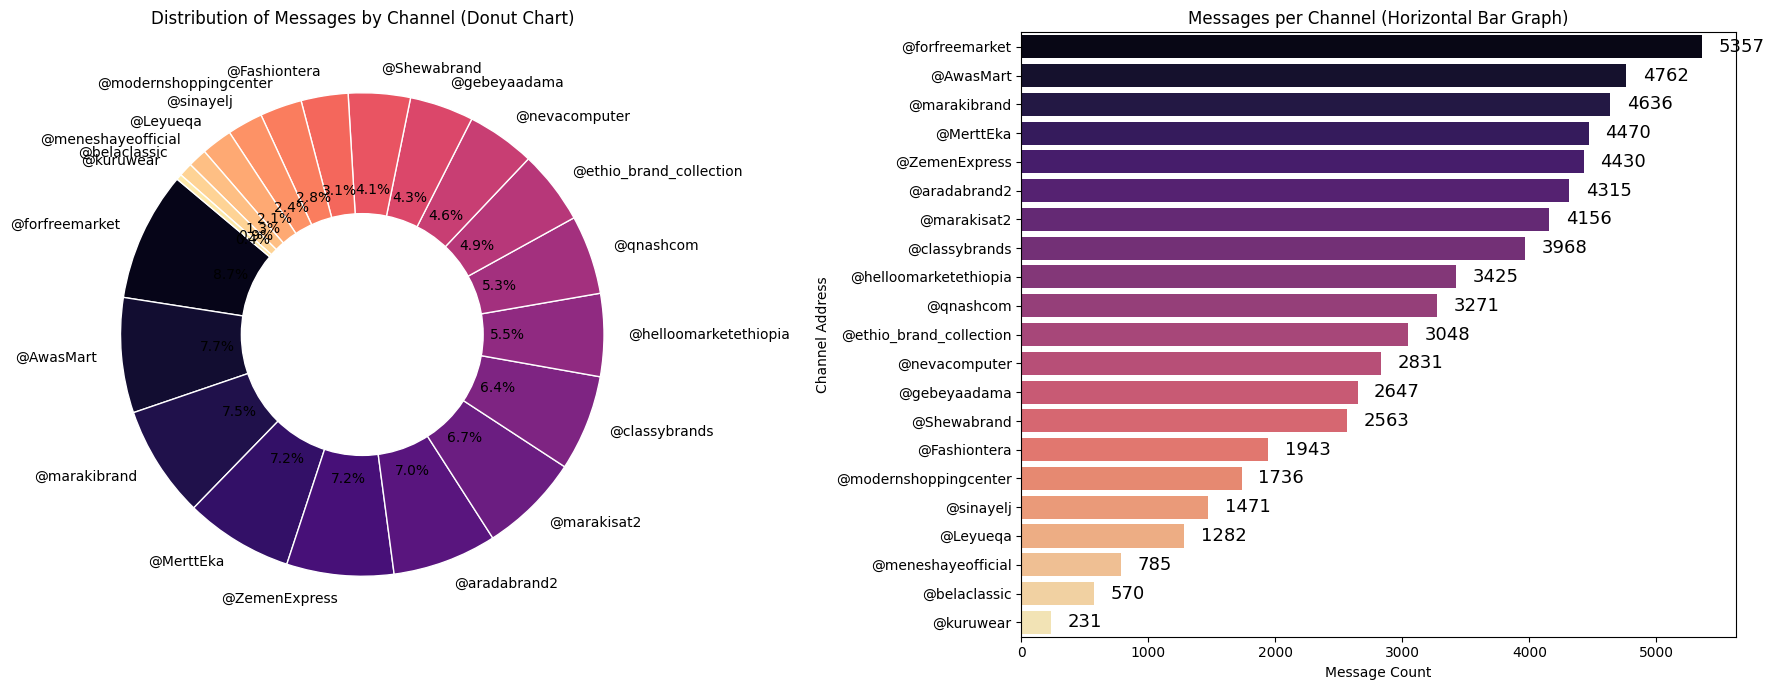

In [17]:
# Plots message distribution by channel.
plot_channel_distribution(df)

- **Top Channels:** @forfreemarket leads with 5,357 messages, while @kuruwear has the fewest at 231, indicating a significant disparity in channel activity.  
- **Channel Concentration:** The top 5 channels account for over 22,000 messages, suggesting a high concentration of activity in a few channels.  
- **Lower Engagement:** Channels like @belaclassic and @kuruwear show relatively low engagement, potentially reflecting niche audiences or limited reach.

### Word Cloud Visualizations

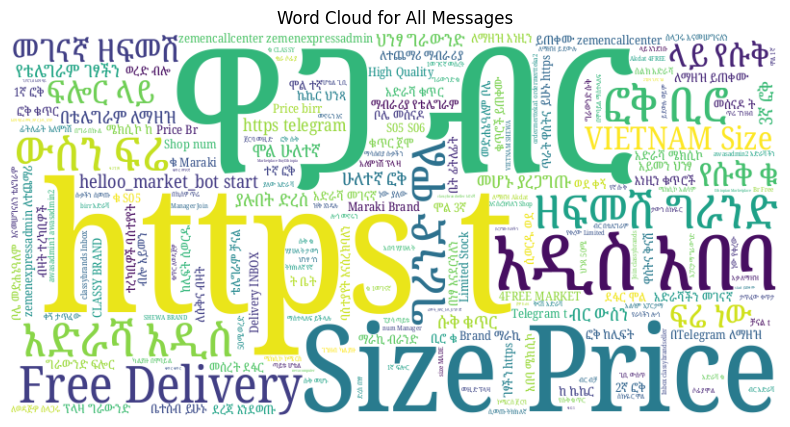

In [18]:
# Plot word cloud for all text (default)
plot_word_cloud(df)

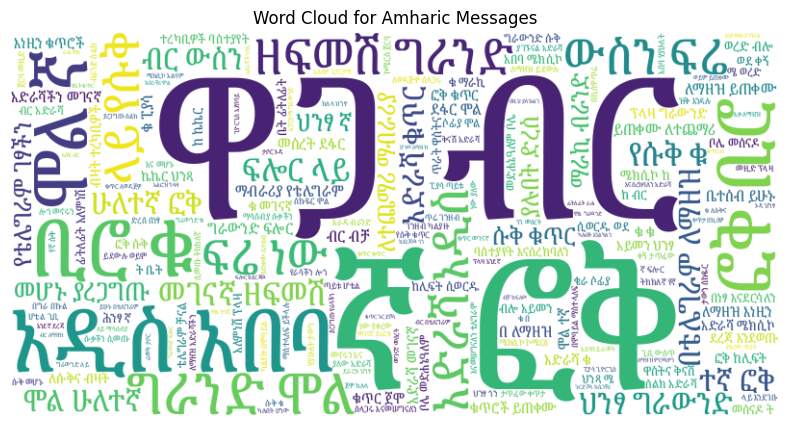

In [19]:
# Plot word cloud for Amharic text
plot_word_cloud(df, language="amharic")

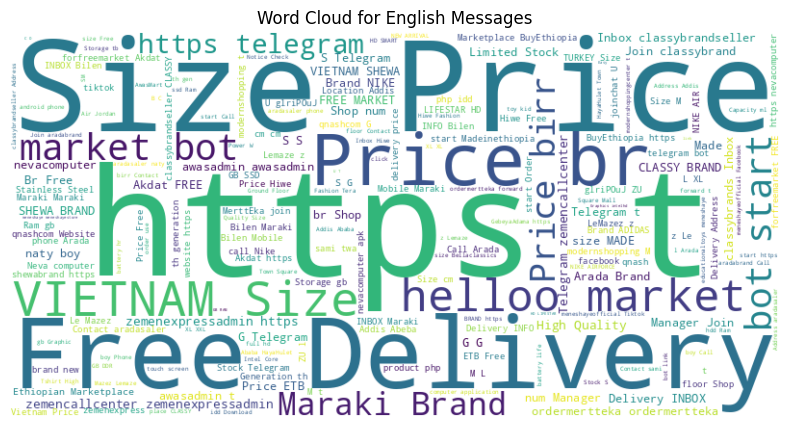

In [20]:
# Plot word cloud for English text
plot_word_cloud(df, language="english")